# Project DEFI: Decision-Feedback Equalizer Implementation

**Objective:** Use a Decision Feedback Equalizer to mitigate Interference Inter Sysmbol in a simple digital channel.

This notebook can leverages example of **PySDR** available at :
https://github.com/777arc/PySDR/tree/ba4f470767bbd5b460217ec2f78ade82845c15e8/figure-generating-scripts


## 1. Import Required Libraries

In [ ]:
%pip install --upgrade pip setuptools wheel

%pip install -r ../requirements.txt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')  

from utils import *



## 2. Simulate ISI Channel
- Create a simple 2-tap channel.
- Generate BPSK symbols and pass them through the channel.

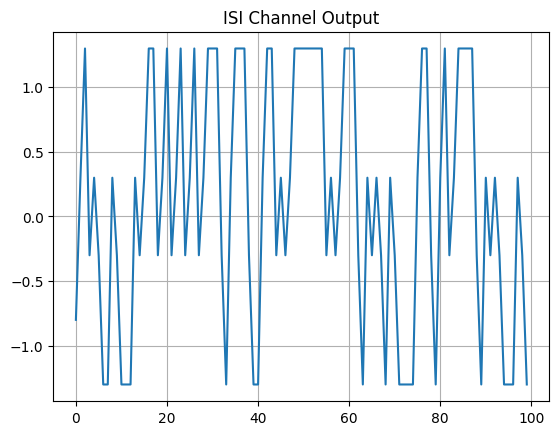

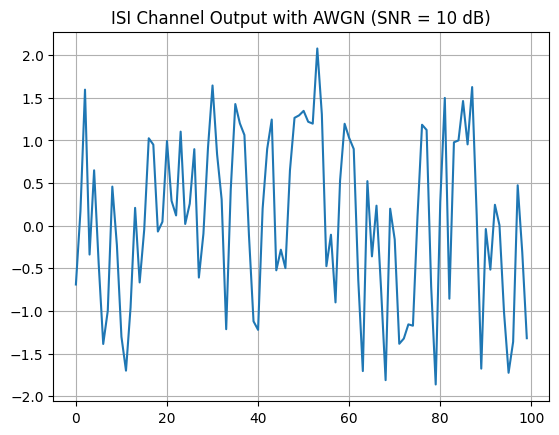

In [4]:
# TODO: ISI channel simulation
num_symbols = 1000
bits = np.random.randint(0, 2, num_symbols)
symbols = 2*bits - 1

# 2-tap channel: h[n] = [0.8, 0.5]
isi_channel = np.array([0.8, 0.5])
received = np.convolve(symbols, isi_channel, mode='same')

plt.figure()
plt.plot(received[:100])
plt.title('ISI Channel Output')
plt.grid()
plt.show()

snr_db = 10
received_noisy = add_awgn_noise(received, snr_db)

# Optional: Plotten
plt.plot(received_noisy[:100])
plt.title(f'ISI Channel Output with AWGN (SNR = {snr_db} dB)')
plt.grid(True)
plt.show()

## 3. Visualize ISI Effects (Eye Diagram)

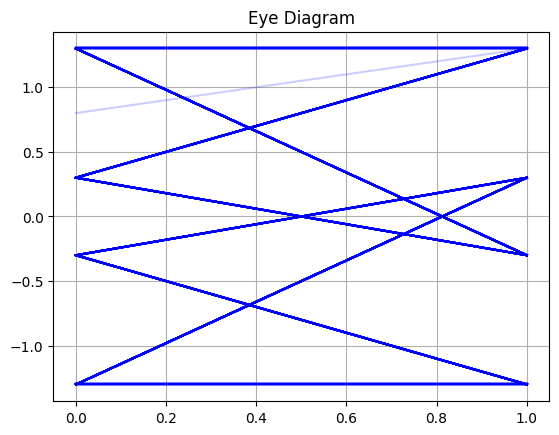

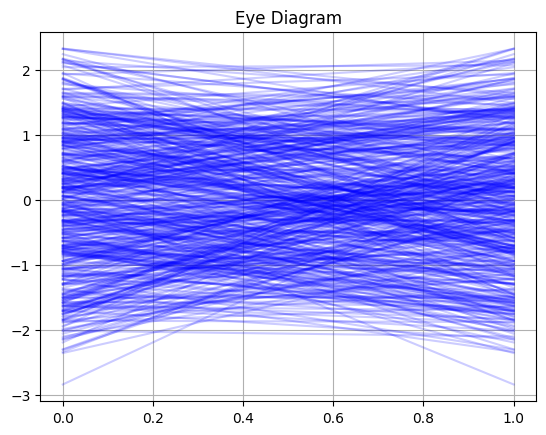

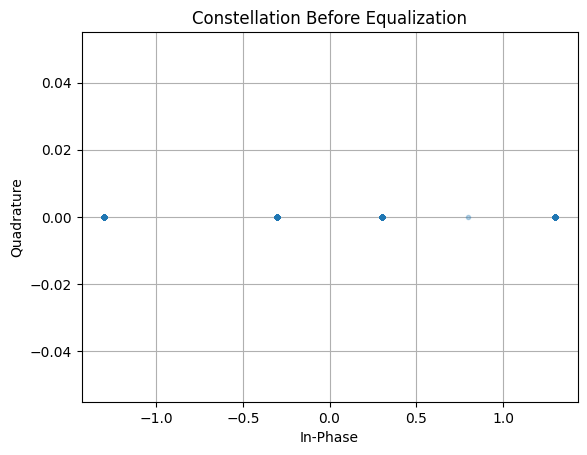

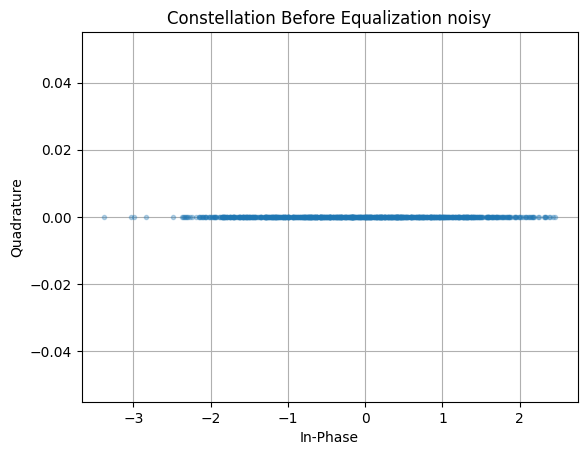

In [23]:
# TODO: Eye diagram before equalization
#digital.plot_eye(received, sps=1)

def plot_eye(signal, sps=1, span=2, offset=0):
    num_segments = len(signal) // (sps * span)
    plt.figure()
    for i in range(num_segments):
        start = i * sps
        segment = signal[start+offset:start+offset+sps*span]
        if len(segment) == sps*span:
            plt.plot(segment, color='blue', alpha=0.2)
    plt.title('Eye Diagram')
    plt.grid(True)
    plt.show()

# Eye Diagram
plot_eye(received, sps=1)

plot_eye(received_noisy, sps=1)

sps = 1
# Constellation Plot
plt.figure()
plt.plot(received[::sps], np.zeros_like(received[::sps]), '.', alpha=0.3)
plt.title('Constellation Before Equalization')
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(received_noisy[::sps], np.zeros_like(received_noisy[::sps]), '.', alpha=0.3)
plt.title('Constellation Before Equalization noisy')
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.grid(True)
plt.show()




## 4. Implement DFE Equalizer

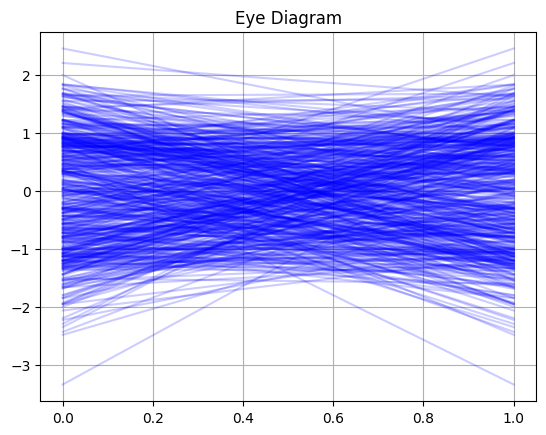

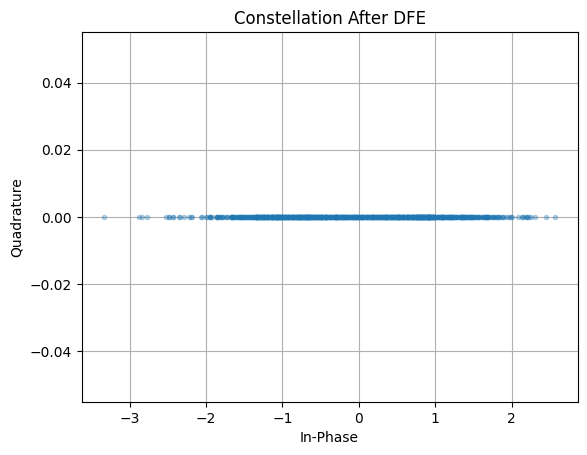

In [24]:
# TODO: Implement basic DFE equalizer

decisions = np.zeros_like(received_noisy)
dfe_output = np.zeros_like(received_noisy)

# DFE parameter
h1 = 0.5

# DFE Loop
for i in range(1, len(received_noisy)):
    dfe_output[i] = received_noisy[i] - h1 * decisions[i-1]
    decisions[i] = 1 if dfe_output[i] >= 0 else -1

# Eye Diagram after Equalization
plot_eye(dfe_output, sps=1)

# Constellation after Equalization
plt.figure()
plt.plot(dfe_output[::sps], np.zeros_like(dfe_output[::sps]), '.', alpha=0.3)
plt.title('Constellation After DFE')
plt.xlabel('In-Phase')
plt.ylabel('Quadrature')
plt.grid(True)
plt.show()

## 5. BER Analysis

In [25]:
# TODO: Compute BER before and after equalization.

# BER Analysis
original_bits = (symbols + 1) // 2
dfe_bits = (decisions + 1) // 2

# BER Calculation
bit_errors_before = np.sum((received_noisy >= 0).astype(int) != original_bits)
bit_errors_after = np.sum(dfe_bits != original_bits)

ber_before = bit_errors_before / num_symbols
ber_after = bit_errors_after / num_symbols

print(f'BER before DFE: {ber_before:.4e}')
print(f'BER after DFE:  {ber_after:.4e}')

BER before DFE: 1.2300e-01
BER after DFE:  8.4000e-02


## 6. Reflection
- How does DFE mitigate ISI?
- Practical relevance (DSL, LTE, etc.).